Importing all the required libraries, dataset.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('Heart_Disease_Data.csv', na_values='?')

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


The attributes are checked to have null or missing values in them.

In [6]:
data.isnull().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slop              0
ca                4
thal              2
pred_attribute    0
dtype: int64

The missing values are given the average value of the particular column they belong to.

In [7]:
values = {'ca': data['ca'].mean(), 'thal':data['thal'].mean()}
print(values)
data=data.fillna(value=values)

{'ca': 0.6722408026755853, 'thal': 4.73421926910299}


In [8]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [12]:
x = data.drop(['pred_attribute'],axis = 1)
y = data['pred_attribute']

We are using RandomForestClassifier algorithm here to train our model.

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rfc = RandomForestClassifier()

In [15]:
rfc.fit(X_train,y_train)

/home/arti/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
pred = rfc.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
acc = accuracy_score(pred,y_test)
acc

0.6593406593406593

We will be checking the priority of the features or the columns of our dataset, which affect our pred_attribute the most.

In [19]:
features = data.columns

In [20]:
feature_priority = rfc.feature_importances_
feature_priority

array([0.10746181, 0.02842611, 0.07504622, 0.10843101, 0.11674998,
       0.01679621, 0.04134685, 0.13672335, 0.04129043, 0.12423733,
       0.03058052, 0.11276495, 0.06014523])

In [21]:
indices = np.argsort(feature_priority)[::-1]

In [22]:
print(indices)

[ 7  9  4 11  3  0  2 12  6  8 10  1  5]


In [23]:
for i in range(X_train.shape[1]):
    
    print("{} {} = {}".format(i+1, features[indices[i]], feature_priority[indices[i]]))

1 thalach = 0.13672335328133373
2 oldpeak = 0.12423732872889867
3 chol = 0.11674998026261112
4 ca = 0.11276494991032142
5 trestbps = 0.10843100661700733
6 age = 0.10746180768710471
7 cp = 0.0750462233305246
8 thal = 0.06014522828668747
9 restecg = 0.04134684576103277
10 exang = 0.041290429324715314
11 slop = 0.030580523801567016
12 sex = 0.02842611441867356
13 fbs = 0.016796208589522233


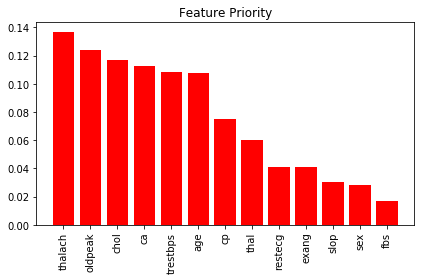

In [24]:
plt.title('Feature Priority')
plt.bar(range(X_train.shape[1]), feature_priority[indices], color= 'red', align='center')
plt.xticks(range(X_train.shape[1]), features[indices], rotation = 90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

Now, according to the feature priority we can see which feature is more essential for the prediction of our target and which is least.
The least prior ones are removed and the model is trained again and we check the accuracy.

In [25]:
X = data.drop(['fbs', 'sex', 'pred_attribute'], axis=1)
Y = data['pred_attribute']

In [26]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [27]:
rfc.fit(X1_train, y1_train)
pred1 = rfc.predict(X1_test)

In [28]:
acc1 = accuracy_score(pred1, y1_test)
print('Dimensionally reduced accuracy of dataset is:', acc1)

Dimensionally reduced accuracy of dataset is: 0.5901639344262295


In [ ]:
Lets check another algorithm for the dataset training , so that we can compare the results of both.
We our using K nearest Neighbors algorith for classifying the heart disease dataset.

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(n_neighbors=1)

In [32]:
x2 = data.drop(['pred_attribute'], axis=1)
y2 = data['pred_attribute']

In [42]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=1)

In [43]:
knn.fit(X2_train, y2_train)
pred2 = knn.predict(X2_test)

In [45]:
acc2 = accuracy_score(pred2, y2_test)
print('KNN used accuracy of dataset is:', acc2)

KNN used accuracy of dataset is: 0.5245901639344263


KNN performed fine, not better than random forest though.